In [169]:
import torch
import random
import numpy as np
from torch import nn
from torch.nn import functional as f
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
X, y = fetch_california_housing(return_X_y=True)

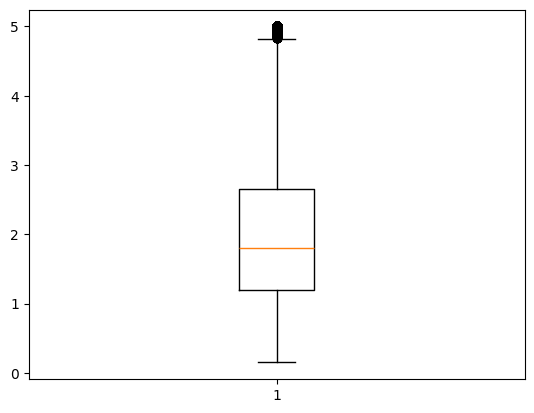

In [171]:
plt.boxplot(y)
plt.show()

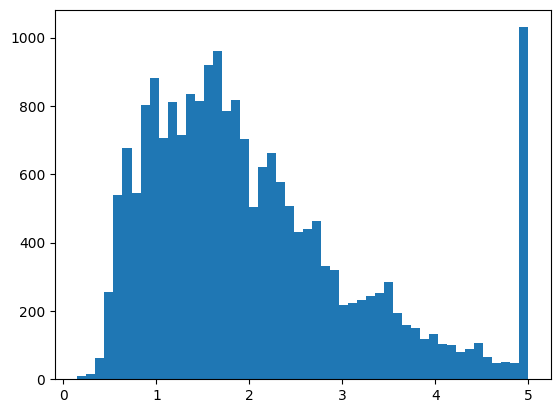

In [172]:
plt.hist(y, bins=50)
plt.show()

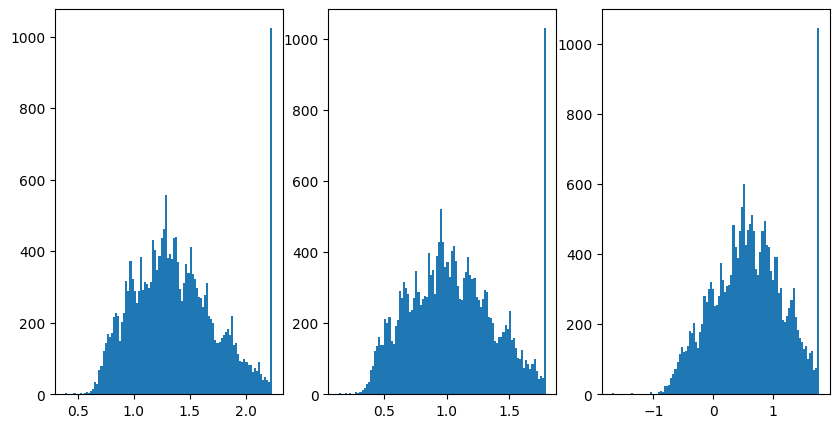

In [173]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(np.sqrt(y), bins=100)
plt.subplot(1,3,2)
plt.hist(np.log1p(y), bins=100)
plt.subplot(1,3,3)
plt.hist(boxcox(y)[0], bins=100)
plt.show()

In [174]:
X = torch.tensor(
    data=StandardScaler().fit_transform(X), dtype=torch.float32
)

y = torch.tensor(
    data=np.log1p(y), dtype=torch.float32
).reshape(-1, 1)

In [175]:
X.shape[0]

20640

Função de divisão de dados de test e train

In [176]:
xtrain, xtest, ytrain, ytest =train_test_split(X,y, test_size=0.25, random_state=32)

In [177]:
xtrain.shape, xtest.shape

(torch.Size([15480, 8]), torch.Size([5160, 8]))

In [178]:
xtrain.shape[0]//10

1548

criando modelo

In [179]:
class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_   = nn.Linear(in_features=8, out_features=16)
        self.hidden_1 = nn.Linear(in_features=16, out_features=8)
        self.hidden_2 = nn.Linear(in_features=8, out_features=4)
        self.hidden_3 = nn.Linear(in_features=4, out_features=2)
        self.output_  = nn.Linear(in_features=2, out_features=1)
        


    def forward(self, x):
        x = f.relu(self.input_(x))
        x = f.relu(self.hidden_1(x))
        x = f.relu(self.hidden_2(x))
        x = f.relu(self.hidden_3(x))
        return self.output_(x)

model = Model()

In [180]:
loss_fn = nn.MSELoss()

optim   = torch.optim.Adam(
    params=model.parameters(), lr=0.001
)

definido dataset

In [181]:
xtrain.shape[0]//32

483

In [182]:
tensor = TensorDataset(xtrain, ytrain)
train  = DataLoader(
    tensor, 
    batch_size=10,
    shuffle   =True
)
n_epoch = 10

In [183]:
for epoch in range(n_epoch):
    mean_loss = [] 
    for xbatch, ybatch in train:

        pred = model(xbatch)
        loss = loss_fn(ybatch, pred)

        mean_loss.append(loss.item())

        optim.zero_grad()
        loss.backward()
        optim.step()
    print(f'loss = {np.mean(mean_loss):.4f} ------- epoch_{epoch}')

loss = 0.0829 ------- epoch_0
loss = 0.0364 ------- epoch_1
loss = 0.0337 ------- epoch_2
loss = 0.0325 ------- epoch_3
loss = 0.0324 ------- epoch_4
loss = 0.0315 ------- epoch_5
loss = 0.0304 ------- epoch_6
loss = 0.0298 ------- epoch_7
loss = 0.0293 ------- epoch_8
loss = 0.0288 ------- epoch_9


In [189]:
with torch.no_grad():
    predict = model(xtest)
predict = predict

In [191]:
predict

tensor([[0.5546],
        [1.1031],
        [1.1619],
        ...,
        [0.7773],
        [1.5732],
        [1.4989]])

In [193]:
p_ = predict.expm1().detach().numpy()
y_ = ytest.expm1().detach().numpy()

In [187]:
from sklearn.metrics import r2_score, mean_absolute_error

In [195]:
mean_absolute_error(p_, y_), r2_score(p_, y_)

(0.37909743, 0.6609133061174168)